Doni Maulana Syahputra (T. Geologi)

# Regression (Tabular Data)

## Importing Modules

In [1]:
## Library untuk pengolahan data
import numpy as np
import pandas as pd
## Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
## Library untuk statistik
from scipy import stats
## Library Sklearn
from sklearn.preprocessing import MinMaxScaler
## Library untuk serialisasi data
import pickle
## import path dari os
from os import path
## Library untuk regression and time series regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
## Unsupervised Learning 
import sklearn.cluster as cluster
import time

In [2]:
data_initial = pd.read_csv("sales_subset.csv", index_col = "Unnamed: 0")
data_initial

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [3]:
data_initial.shape

(10774, 9)

In [4]:
data_initial.tail()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623
10773,39,A,99,2012-10-05,915.00,False,22.250000,0.955511,6.228


In [5]:
data_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 768.1+ KB


In [6]:
data = pd.get_dummies(data_initial, columns = ["type", "is_holiday"])
data

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True
0,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0
1,1,1,2010-03-05,21827.90,8.055556,0.693452,8.106,1,0,1,0
2,1,1,2010-04-02,57258.43,16.816667,0.718284,7.808,1,0,1,0
3,1,1,2010-05-07,17413.94,22.527778,0.748928,7.808,1,0,1,0
4,1,1,2010-06-04,17558.09,27.050000,0.714586,7.808,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10769,39,99,2011-12-09,895.00,9.644444,0.834256,7.716,1,0,1,0
10770,39,99,2012-02-03,350.00,15.938889,0.887619,7.244,1,0,1,0
10771,39,99,2012-06-08,450.00,27.288889,0.911922,6.989,1,0,1,0
10772,39,99,2012-07-13,0.06,25.644444,0.860145,6.623,1,0,1,0


In [7]:
x = data.drop(["date", "weekly_sales"], axis = 1)
y = data["weekly_sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [8]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [9]:
lr_model.predict(x_test)

array([24735.03908985, 20510.81354333, 18682.63544578, ...,
       31124.83702361, 21466.71039478, 30803.77257151])

In [10]:
lr_model.score(x_test, y_test)

0.02507233805159259

In [11]:
y_test

4116       -41.00
5743      8075.03
5453     55131.81
4545    103531.25
781      49541.90
          ...    
3841     21239.50
7357     24053.52
5232     33897.98
3105      3662.00
4281    218559.54
Name: weekly_sales, Length: 1078, dtype: float64

In [12]:
y_pred = lr_model.predict(x_test)

In [13]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.r2_score(y_test, y_pred))

MAE 21859.251199969298
MSE 882193282.6957321
RMSE 29701.73871502697
R2 0.02507233805159259


# Unsupervised Learning
## K-Means Algorithm

In [15]:
#load data
dt = np.load("cluster_data.npy")
dt.shape

(2309, 2)

In [16]:
dt.transpose()


array([[-0.12153499, -0.22093687,  0.1259037 , ...,  0.50243143,
         0.53822256, -0.08688887],
       [-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
         0.19412199, -0.2092721 ]])

In [17]:
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)
plt.style.use('fivethirtyeight')

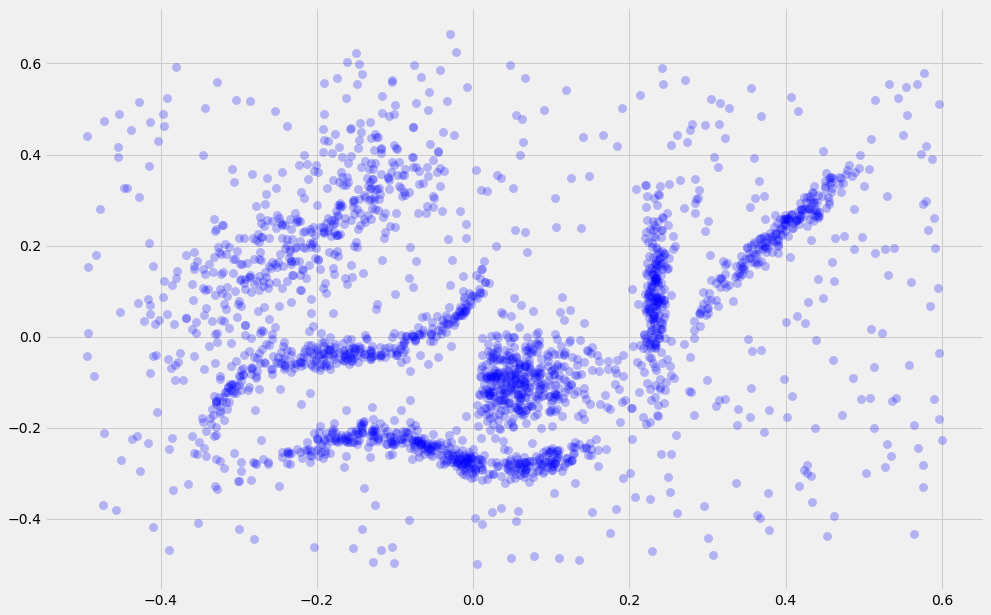

In [18]:
# Visualizing the data
plt.scatter(dt.T[0], dt.T[1], c="blue", **plot_kwds) 
frame = plt.gca() 
frame.axes.get_xaxis().set_visible = False # set_visible(False) untuk menghapus xaxis
frame.axes.get_yaxis().set_visible = False # set_visible(False) untuk menghapus. yaxis

Text(-0.5, 0.7, 'Clustering took 0.38 s')

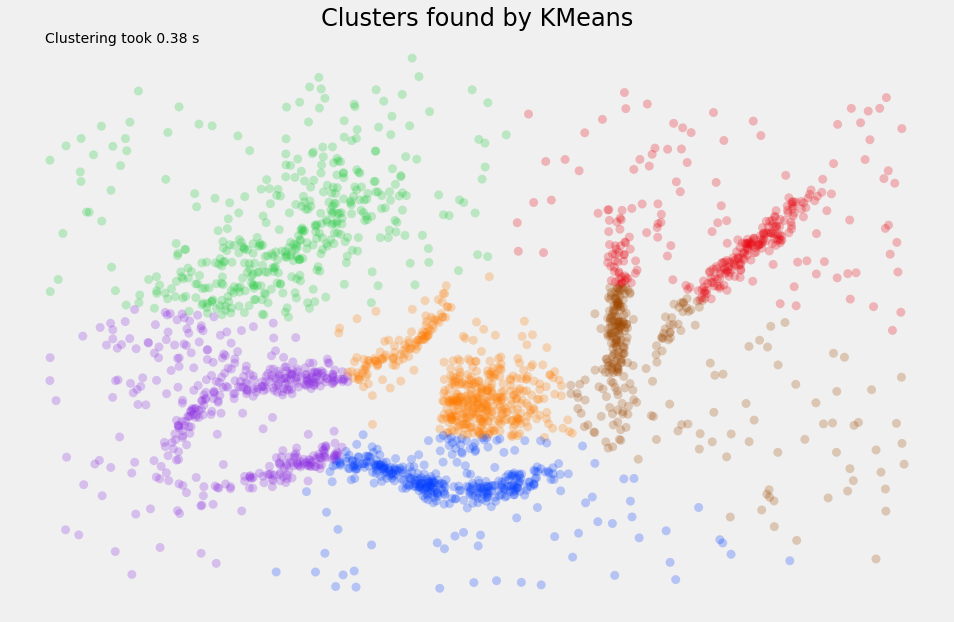

In [19]:
start_time = time.time() # method .time() dari library time untuk menghitung waktu awal
cluster_model = cluster.KMeans(n_clusters= 6).fit(dt)
labels = cluster_model.predict(dt) 
end_time = time.time() 
#colors for visual representation
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
# plotting the data, removing the axis and adding title and time
plt.scatter(dt.T[0], dt.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(cluster.KMeans.__name__)), fontsize=24) # set title dengan menampilkan nama algoritmanya
plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14) # cari durasi waktu dengan cara mengurangi waktu akhir dengan waktu awal

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(dt, cluster_model.predict(dt))

0.4080656577651516

# Time Series Regression

In [14]:
data["date"] = pd.to_datetime(data["date"])

In [15]:
data.sort_values(by = "date", inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10774 entries, 0 to 3384
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10774 non-null  int64         
 1   department            10774 non-null  int64         
 2   date                  10774 non-null  datetime64[ns]
 3   weekly_sales          10774 non-null  float64       
 4   temperature_c         10774 non-null  float64       
 5   fuel_price_usd_per_l  10774 non-null  float64       
 6   unemployment          10774 non-null  float64       
 7   type_A                10774 non-null  uint8         
 8   type_B                10774 non-null  uint8         
 9   is_holiday_False      10774 non-null  uint8         
 10  is_holiday_True       10774 non-null  uint8         
dtypes: datetime64[ns](1), float64(4), int64(2), uint8(4)
memory usage: 715.5 KB


In [17]:
data.set_index("date", inplace=True, drop = False)

In [18]:
data

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True
date,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0
2010-02-05,19,13,2010-02-05,38597.52,-6.133333,0.780365,8.350,1,0,1,0
2010-02-05,2,31,2010-02-05,3840.21,4.550000,0.679451,8.324,1,0,1,0
2010-02-05,19,14,2010-02-05,17590.59,-6.133333,0.780365,8.350,1,0,1,0
2010-02-05,19,16,2010-02-05,4929.87,-6.133333,0.780365,8.350,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2012-10-05,6,99,2012-10-05,440.00,21.577778,0.955511,5.329,1,0,1,0
2012-10-05,20,99,2012-10-05,660.00,15.983333,1.052726,7.293,1,0,1,0
2012-10-05,39,99,2012-10-05,915.00,22.250000,0.955511,6.228,1,0,1,0


## Feature Engineering untuk EDA dan Training Machine Learning

In [19]:
data['year'] =  pd.DatetimeIndex(data.index.get_level_values("date")).year
data['month'] = pd.DatetimeIndex(data.index.get_level_values("date")).month
data['week'] = pd.DatetimeIndex.isocalendar(data.index.get_level_values("date")).week

In [20]:
data.head()

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,week
date,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0,2010,2,5
2010-02-05,19,13,2010-02-05,38597.52,-6.133333,0.780365,8.350,1,0,1,0,2010,2,5
2010-02-05,2,31,2010-02-05,3840.21,4.550000,0.679451,8.324,1,0,1,0,2010,2,5
2010-02-05,19,14,2010-02-05,17590.59,-6.133333,0.780365,8.350,1,0,1,0,2010,2,5
2010-02-05,19,16,2010-02-05,4929.87,-6.133333,0.780365,8.350,1,0,1,0,2010,2,5


## Mendeteksi Outlier dan Abnormalities

In [21]:
agg_data = data.groupby(["store", "department"]).weekly_sales.aggregate(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data

,store,department,max,min,mean,median,std
0,1,1,57258.43,15984.24,23491.755000,18826.140,11836.469193
1,1,2,50605.27,43202.29,47421.124167,47676.755,2196.876181
2,1,3,26719.02,7857.88,12872.590000,11006.965,5452.400241
3,1,4,40973.88,34912.45,38382.255833,38033.370,1697.974651
4,1,5,36472.02,15390.52,23761.120000,23007.200,6288.746971
...,...,...,...,...,...,...,...
924,39,95,114691.10,83451.22,97174.169167,98234.110,9801.100705
925,39,96,32629.87,17294.65,24947.875833,25899.650,4536.946269
926,39,97,26882.38,20792.64,23002.670000,22756.870,1638.481608
927,39,98,11831.34,7666.71,9089.097500,9001.905,1073.164258


In [22]:
agg_data.isna().sum()

store         0
department    0
max           0
min           0
mean          0
median        0
std           6
dtype: int64

## Merging Dataset

In [23]:
merge_data = pd.merge(left=data, right=agg_data, on= ["store", "department"], how ="left")
merge_data.dropna(inplace=True) # drop NaN values
data = merge_data.copy() # gunakan copy dan masukkan data merge ke dalam data
del merge_data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10773
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   store                 10768 non-null  int64         
 1   department            10768 non-null  int64         
 2   date                  10768 non-null  datetime64[ns]
 3   weekly_sales          10768 non-null  float64       
 4   temperature_c         10768 non-null  float64       
 5   fuel_price_usd_per_l  10768 non-null  float64       
 6   unemployment          10768 non-null  float64       
 7   type_A                10768 non-null  uint8         
 8   type_B                10768 non-null  uint8         
 9   is_holiday_False      10768 non-null  uint8         
 10  is_holiday_True       10768 non-null  uint8         
 11  year                  10768 non-null  int64         
 12  month                 10768 non-null  int64         
 13  week            

In [25]:
data['date'] = pd.to_datetime(data["date"])
data.sort_values(by = "date", inplace = True)
data.set_index("date", inplace = True, drop = False)

In [26]:
data

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,week,max,min,mean,median,std
date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0,2010,2,5,57258.43,15984.24,23491.755000,18826.140,11836.469193
2010-02-05,4,9,2010-02-05,21654.54,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,50838.74,20225.33,28856.843333,27619.385,8222.067191
2010-02-05,10,72,2010-02-05,232558.51,12.411111,0.782478,9.765,0,1,1,0,2010,2,5,232558.51,116112.11,145237.726667,124913.845,42833.629978
2010-02-05,10,74,2010-02-05,56702.80,12.411111,0.782478,9.765,0,1,1,0,2010,2,5,56702.80,34755.45,44480.321667,43253.660,6590.616419
2010-02-05,10,78,2010-02-05,12.00,12.411111,0.782478,9.765,0,1,1,0,2010,2,5,12.00,-12.00,1.714286,0.000,10.796825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-05,20,96,2012-10-05,18.89,15.983333,1.052726,7.293,1,0,1,0,2012,10,40,80.96,-8.97,14.078889,10.000,26.908222
2012-10-05,19,39,2012-10-05,13.41,15.477778,1.096579,7.992,1,0,1,0,2012,10,40,13.41,4.47,10.430000,13.410,5.161511
2012-10-05,39,99,2012-10-05,915.00,22.250000,0.955511,6.228,1,0,1,0,2012,10,40,915.00,0.01,317.189091,167.000,357.130913


### Outlier Deletion

In [27]:
numeric_col = ['weekly_sales','temperature_c','fuel_price_usd_per_l','unemployment']
data_numeric = data[numeric_col].copy()

In [28]:
data.shape

(10768, 19)

In [29]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape # shape

(9940, 19)

### Negative Weekly Sales

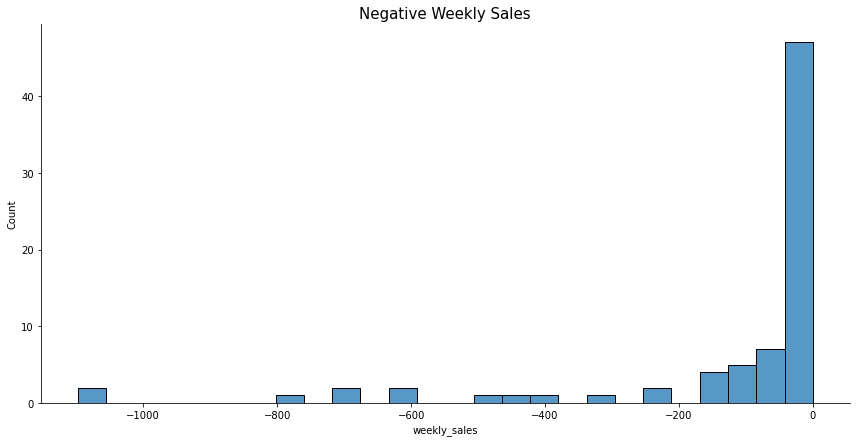

In [30]:
y = data["weekly_sales"][data.weekly_sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [31]:
data = data[data["weekly_sales"] >= 0]

In [32]:
data.shape

(9864, 19)

In [33]:
data

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,week,max,min,mean,median,std
date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0,2010,2,5,57258.43,15984.24,23491.755000,18826.140,11836.469193
2010-02-05,4,9,2010-02-05,21654.54,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,50838.74,20225.33,28856.843333,27619.385,8222.067191
2010-02-05,4,8,2010-02-05,71562.58,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,71817.79,62358.61,66521.651667,65534.225,3170.651042
2010-02-05,4,17,2010-02-05,20612.43,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,20612.43,12687.93,16334.116667,16398.265,1999.190438
2010-02-05,4,16,2010-02-05,7437.73,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,51812.80,2746.76,21340.980833,16425.565,16919.122743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-03,2,99,2012-02-03,365.00,12.894444,0.887619,7.057,1,0,1,0,2012,2,5,2850.00,-147.00,455.516364,165.000,831.279125
2012-02-03,39,99,2012-02-03,350.00,15.938889,0.887619,7.244,1,0,1,0,2012,2,5,915.00,0.01,317.189091,167.000,357.130913
2012-06-22,39,47,2012-06-22,18.00,26.577778,0.883920,6.989,1,0,1,0,2012,6,25,40.00,-19.00,14.000000,18.000,22.891046


In [34]:
data.to_csv('./preprocessed_walmart_dataset.csv')

# Data Visualizations

Rata-rata penjualan perbulan

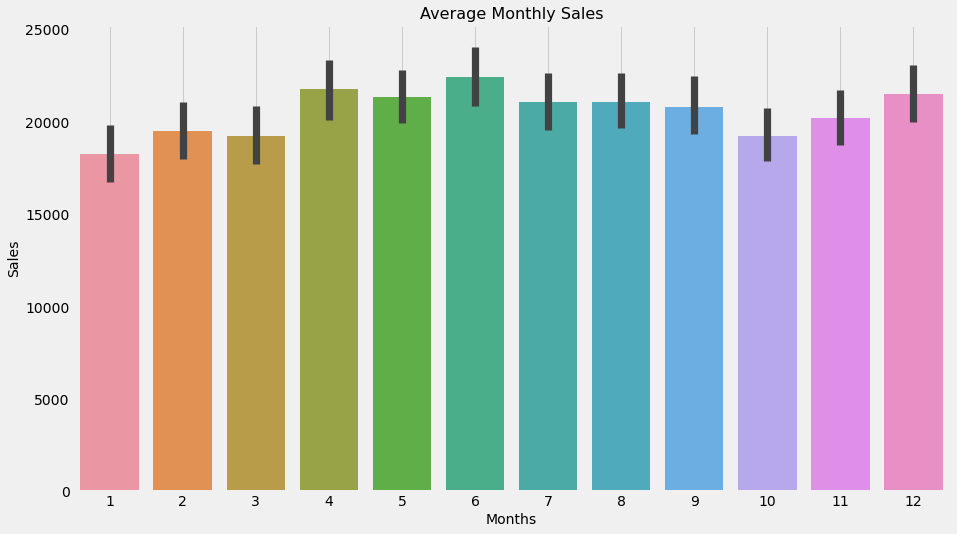

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(x="month",y="weekly_sales",data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

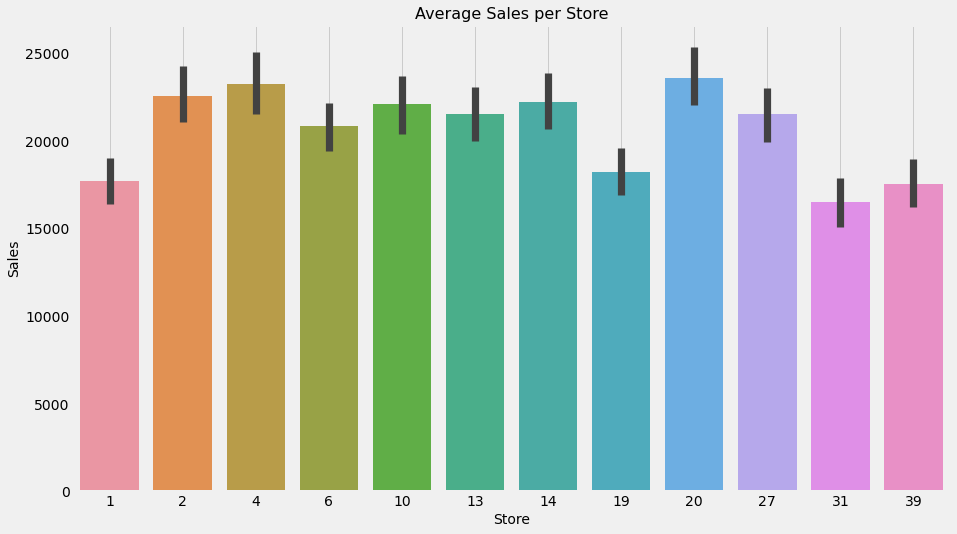

In [43]:
plt.figure(figsize=(14,8))
sns.barplot(x="store",y="weekly_sales",data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Store',fontsize=14)
plt.title('Average Sales per Store',fontsize=16)
plt.grid()

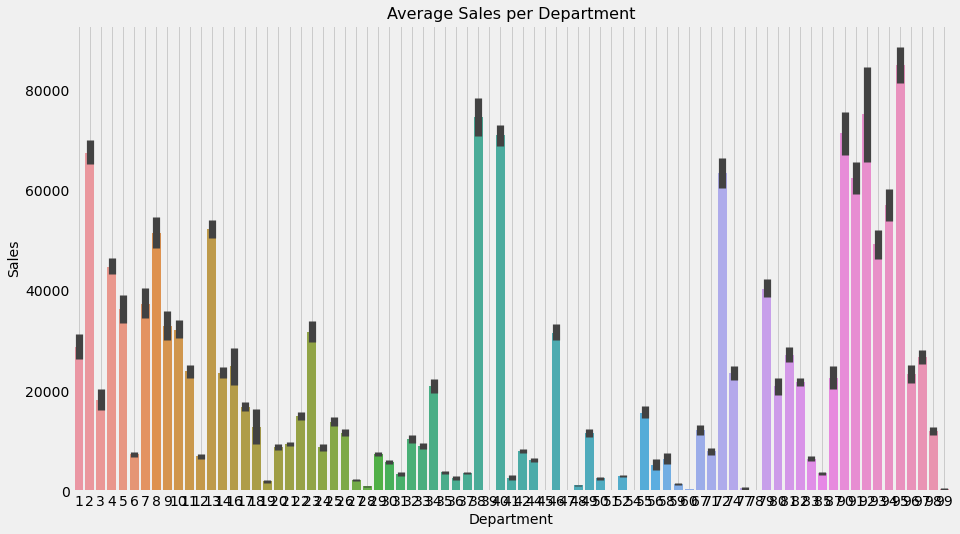

In [44]:
plt.figure(figsize=(14,8))
sns.barplot(x="department",y="weekly_sales",data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.title('Average Sales per Department',fontsize=16)
plt.grid()

# Time Series Decompose

## One Hot Encode

In [35]:
data

,store,department,date,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,week,max,min,mean,median,std
date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0,2010,2,5,57258.43,15984.24,23491.755000,18826.140,11836.469193
2010-02-05,4,9,2010-02-05,21654.54,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,50838.74,20225.33,28856.843333,27619.385,8222.067191
2010-02-05,4,8,2010-02-05,71562.58,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,71817.79,62358.61,66521.651667,65534.225,3170.651042
2010-02-05,4,17,2010-02-05,20612.43,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,20612.43,12687.93,16334.116667,16398.265,1999.190438
2010-02-05,4,16,2010-02-05,7437.73,6.533333,0.686319,8.623,1,0,1,0,2010,2,5,51812.80,2746.76,21340.980833,16425.565,16919.122743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-03,2,99,2012-02-03,365.00,12.894444,0.887619,7.057,1,0,1,0,2012,2,5,2850.00,-147.00,455.516364,165.000,831.279125
2012-02-03,39,99,2012-02-03,350.00,15.938889,0.887619,7.244,1,0,1,0,2012,2,5,915.00,0.01,317.189091,167.000,357.130913
2012-06-22,39,47,2012-06-22,18.00,26.577778,0.883920,6.989,1,0,1,0,2012,6,25,40.00,-19.00,14.000000,18.000,22.891046


In [36]:
data = pd.get_dummies(data, columns = ["store", "department"])
data.drop(["date"], axis = 1, inplace = True)

In [37]:
data

,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,...,department_90,department_91,department_92,department_93,department_94,department_95,department_96,department_97,department_98,department_99
date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,5.727778,0.679451,8.106,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,21654.54,6.533333,0.686319,8.623,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,71562.58,6.533333,0.686319,8.623,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,20612.43,6.533333,0.686319,8.623,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,7437.73,6.533333,0.686319,8.623,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-03,365.00,12.894444,0.887619,7.057,1,0,1,0,2012,2,...,0,0,0,0,0,0,0,0,0,1
2012-02-03,350.00,15.938889,0.887619,7.244,1,0,1,0,2012,2,...,0,0,0,0,0,0,0,0,0,1
2012-06-22,18.00,26.577778,0.883920,6.989,1,0,1,0,2012,6,...,0,0,0,0,0,0,0,0,0,0


### Data Normalization

In [38]:
num_col = ['weekly_sales','temperature_c','fuel_price_usd_per_l','unemployment','max','min','mean','median','std']

In [39]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))

def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr), 1))
    return df

In [40]:
data = normalization(data, num_col)

In [41]:
data.head()

,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment,type_A,type_B,is_holiday_False,is_holiday_True,year,month,...,department_90,department_91,department_92,department_93,department_94,department_95,department_96,department_97,department_98,department_99
date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.250922,0.334036,0.066286,0.523041,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,0.218002,0.353127,0.096000,0.696939,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,0.720441,0.353127,0.096000,0.696939,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,0.207511,0.353127,0.096000,0.696939,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0
2010-02-05,0.074878,0.353127,0.096000,0.696939,1,0,1,0,2010,2,...,0,0,0,0,0,0,0,0,0,0


## Mencari korelasi di antara features pada dataset

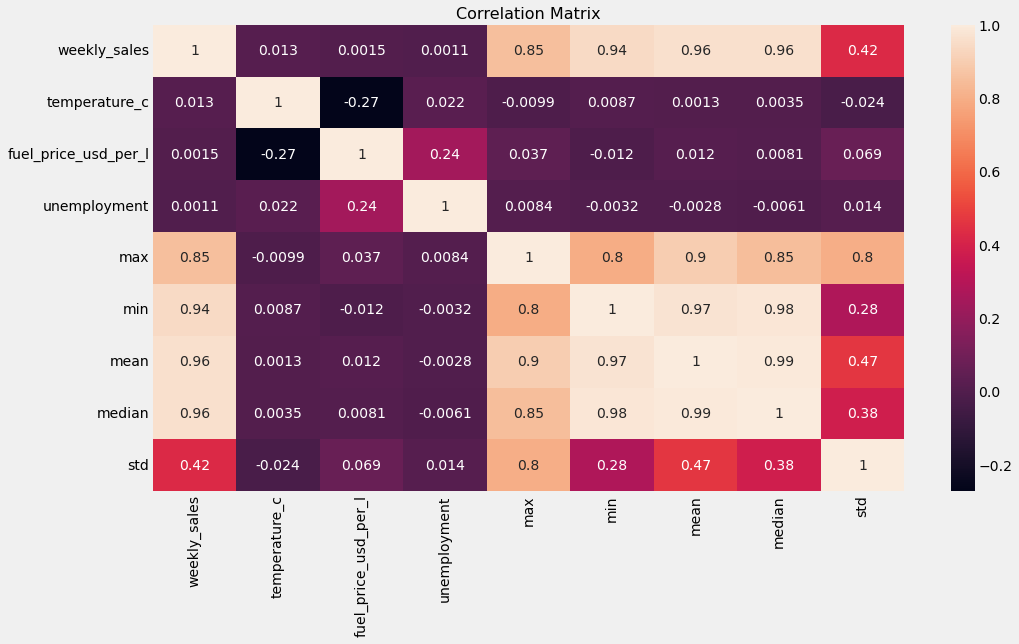

In [52]:
plt.figure(figsize=(15,8))
data = data[num_col].corr()
sns.heatmap(data, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

## Feature Importance

In [42]:
feature_col = data.columns.difference(["weekly_sales"])
feature_col

Index(['department_1', 'department_10', 'department_11', 'department_12',
       'department_13', 'department_14', 'department_16', 'department_17',
       'department_18', 'department_19',
       ...
       'store_31', 'store_39', 'store_4', 'store_6', 'temperature_c', 'type_A',
       'type_B', 'unemployment', 'week', 'year'],
      dtype='object', length=106)

In [43]:
# Gunakan RandomForestRegressor dengan parameter oob_score=True dan n_estimators=23
radm_clf = RandomForestRegressor(oob_score = True, n_estimators = 23)
# Training classifier dimana X adalah data[feature_col] dan data untuk weekly_sales
radm_clf.fit(data[feature_col], data["weekly_sales"])

C:\Users\Doni\miniconda3\envs\universal\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [44]:
radm_clf.feature_importances_ # cek hasil .feature_importances_

array([4.71538078e-04, 3.66306571e-05, 7.83046437e-05, 6.10592025e-06,
       2.90150348e-05, 4.44205971e-05, 1.08723674e-03, 1.49408209e-05,
       9.56342517e-04, 8.77201643e-07, 4.09025193e-05, 7.64989257e-06,
       2.86550293e-06, 1.33070608e-05, 1.07167802e-04, 2.83517208e-05,
       3.14115838e-05, 1.77418607e-05, 9.76642083e-07, 1.67673745e-07,
       3.81799353e-06, 4.69808067e-04, 2.81724390e-06, 5.53476902e-06,
       1.94485881e-05, 1.30914843e-05, 4.80460450e-05, 2.72893218e-06,
       5.12518877e-06, 4.94477882e-07, 5.65682095e-05, 1.44846549e-12,
       2.28330488e-05, 4.07905072e-05, 3.75776093e-05, 2.23406234e-06,
       3.13801064e-06, 8.04912527e-10, 2.71281321e-05, 6.05981365e-10,
       2.78662659e-07, 1.17783960e-05, 4.84501384e-04, 2.39400191e-07,
       4.04262442e-10, 1.53214559e-06, 4.99597513e-08, 2.03070224e-04,
       1.82354391e-04, 1.56140848e-05, 1.10148601e-05, 1.09709445e-05,
       5.42923010e-08, 6.41669490e-05, 4.68854896e-04, 2.78490206e-05,
      

In [45]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
# Buat dataframe baru untuk feature rank dengan columns ['rank', 'feature', 'importance']
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
# Lakukan looping untuk assign nama column beserta nilai importancenya
for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1, data[feature_col].columns[indices[f]], radm_clf.feature_importances_[indices[f]]] 
feature_rank

,rank,feature,importance
0,1,mean,8.543447e-01
1,2,median,8.187325e-02
2,3,temperature_c,1.026916e-02
3,4,min,8.536397e-03
4,5,week,7.361152e-03
...,...,...,...
101,102,department_45,8.049125e-10
102,103,department_47,6.059814e-10
103,104,department_51,4.042624e-10
104,105,department_78,2.613132e-11


In [46]:
x = feature_rank.loc[0:23, ["feature"]]
x = x['feature'].tolist() # ubah menjadi list
print(x)

['mean', 'median', 'temperature_c', 'min', 'week', 'month', 'fuel_price_usd_per_l', 'max', 'std', 'unemployment', 'department_16', 'department_18', 'year', 'department_5', 'department_1', 'department_3', 'department_7', 'department_72', 'department_9', 'department_94', 'department_55', 'store_27', 'department_56', 'store_1']


In [47]:
X = data[x]
y = data["weekly_sales"]

Split Data menjadi Training (X dan y) dan Test (X dan y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)

## Linear Regression Model

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
accuracy = lr.score(X_test, y_test)
print("Linear Regressor Accuracy - ", accuracy * 100)

Linear Regressor Accuracy -  91.00753469397198


In [51]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.44482591e-01, -1.04922946e-02,  7.03498909e-02,  9.93703011e-03,
        1.17641689e-01,  1.50863576e-01,  1.02311383e-01,  4.45515686e-01,
        6.48400300e-02,  2.10412130e-01,  1.35969590e-01,  7.77593306e-02,
        1.20979148e-01,  3.62989530e-02,  4.87206733e-02,  3.60082212e-02,
        1.33850232e-01,  1.22370774e-01,  9.42560368e-02,  6.44113810e-02,
        9.59697553e-02,  1.84059200e-01,  2.58933920e-01,  1.19877394e-01,
        2.84096803e-01,  3.22636653e-01,  5.54681763e-02,  5.50942623e-02,
        2.37003362e-02,  6.19910626e-02,  1.86910241e-02,  2.21561520e-02,
        2.82057408e-02,  1.32893601e-01,  1.38065160e-01,  5.23842968e-01,
        1.76251409e-01,  2.82744991e-01,  1.38796010e-01,  6.36824002e-02,
        3.43408246e-02,  3.71158029e-01,  1.23059631e-02,  2.35626970e-01,
        1.50164977e-01,  3.05643467e-02,  9.51174990e-02,  3.63923164e-02,
        7.97274076e-02,  4.44555688e-01,  2.24447734e-01,  4.57531954e-02,
        9.96313488e-02,  

In [52]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.r2_score(y_test, y_pred))

MAE 0.032386679328122475
MSE 0.004170523791875571
RMSE 0.06457959268898783
R2 0.9100753469397197


In [53]:
# Lakukan comparison pada hasil actual dan hasil predicted pada dataframe
# supaya lebih mudah dilihat dan bisa di export to csv
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('lr_pred.csv')
lr_df

,Actual,Predicted
date,,
2010-10-01,0.119612,0.144483
2011-01-07,0.000221,-0.010492
2010-09-03,0.077355,0.070350
2010-12-03,0.024016,0.009937
2010-02-05,0.173281,0.117642
...,...,...
2010-11-05,0.028615,0.032727
2010-11-05,0.294599,0.313108
2010-08-06,0.352650,0.330899


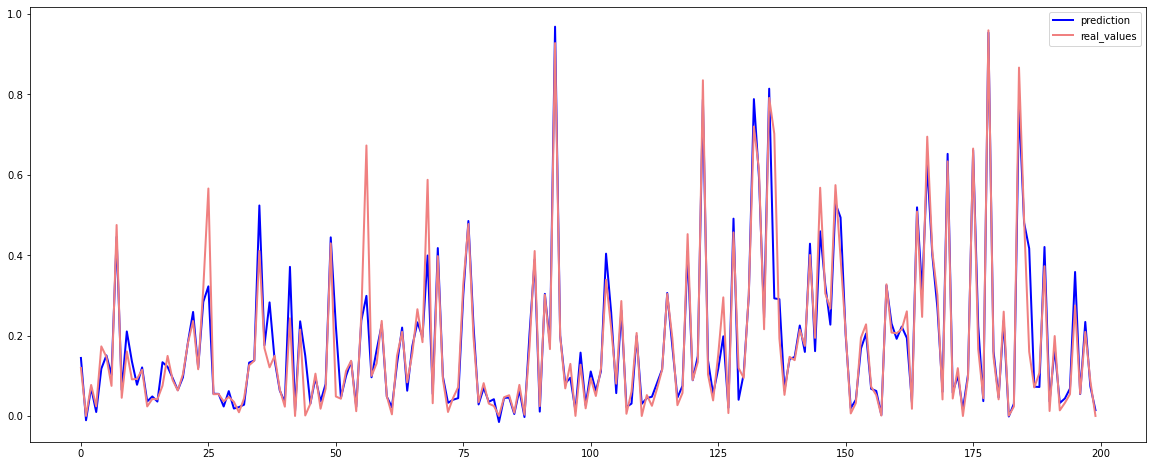

In [54]:
# Plot data time series untuk 200 data pertama dari lr.predict() dan beri label prediction dengan warna biru
# Plot data time series untuk 200 data pertama dari y_test dan beri label real_values dengan warna lightcoral
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label = "prediction" , linewidth = 2.0, color = "blue")
plt.plot(y_test[:200].values, label ="real_values", linewidth = 2.0, color = "lightcoral")
plt.legend(loc="best")
plt.savefig('lr_pred.png')
plt.show()